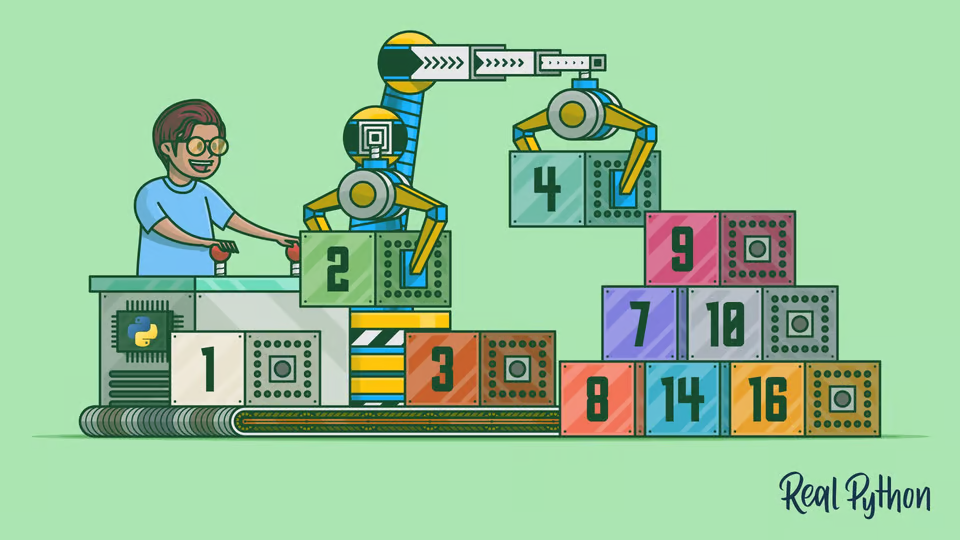

In [2]:
from functions import picture
picture('dfgjkhfdБез имени.png')

The Python heapq Module: Using Heaps and Priority Queues

A priority queue is a powerful tool that can solve problems as varied as writing an email scheduler, finding the shortest path on a map, or merging log files. Programming is full of optimization problems in which the goal is to find the best element. Priority queues and the functions in the Python heapq module can often help with that.

What Are Heaps?

Heaps are concrete data structures, whereas priority queues are abstract data structures. An abstract data structure determines the interface, while a concrete data structure defines the implementation.

Concrete data structures also specify performance guarantees. Performance guarantees define the relationship between the size of the structure and the time operations take. Understanding those guarantees allows you to predict how much time the program will take as the size of its inputs change.

Abstract data structures specify operations and the relationships between them. The priority queue abstract data structure, for example, supports three operations:

is_empty checks whether the queue is empty.
add_element adds an element to the queue.
pop_element pops the element with the highest priority.

Priority queues are commonly used for optimizing task execution, in which the goal is to work on the task with the highest priority. After a task is completed, its priority is lowered, and it’s returned to the queue

There are two different conventions for determining the priority of an element:

The largest element has the highest priority.
The smallest element has the highest priority.

The Python heapq module uses the second convention, which is generally the more common of the two. Under this convention, the smallest element has the highest priority. This might sound surprising, but it’s often quite useful. In the real-life examples you’ll see later, this convention will simplify your code.

Note: The Python heapq module, and the heap data structure in general, is not designed to allow finding any element except the smallest one. For retrieval of any element by size, a better option is a binary search tree.

The heap implementation of the priority queue guarantees that both pushing (adding) and popping (removing) elements are logarithmic time operations. This means that the time it takes to do push and pop is proportional to the base-2 logarithm of the number of elements.

Logarithms grow slowly. The base-2 logarithm of fifteen is about four, while the base-2 logarithm of a trillion is about forty. This means that if an algorithm is fast enough on fifteen elements, then it’s going to be only ten times slower on a trillion elements and will probably still be fast enough.

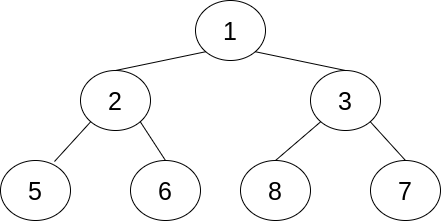

In [3]:
picture('heap-tree.4b4413ff133c.png')

In a heap tree, the value in a node is always smaller than both of its children. This is called the heap property.

The algorithms for both pushing and popping rely on temporarily violating the heap property, then fixing the heap property through comparisons and replacements up or down a single branch.

For example, to push an element onto a heap, Python adds the new node to the next open slot. If the bottom layer isn’t full, then the node is added to the next open slot at the bottom. Otherwise, a new level is created and then the element is added to the new bottom layer.

Once the node is added, Python compares it to its parent. If the heap property is violated, then the node and its parent are switched, and the check begins again at the parent. This continues until the heap property holds or the root has been reached.

Similarly, when popping the smallest element, Python knows that, because of the heap property, the element is at the root of the tree. It replaces the element with the last element at the deepest layer and then checks if the heap property is violated down the branch.

A priority queue, and a heap as an implementation of a priority queue, is useful for programs that involve finding an element that is extreme in some way. For example, you can use a priority queue for any of the following tasks:

Getting the three most popular blog posts from hit data
Finding the fastest way to get from one point to the other
Predicting which bus will be the first to arrive at a station based on arrival frequency

Another task for which you could use a priority queue is scheduling emails. Imagine a system that has several kinds of emails, each of which needs to be sent at a certain frequency. One kind of email needs to go out every fifteen minutes, and another needs to be sent every forty minutes.

In [4]:
import heapq
a = [3, 5, 1, 2, 6, 8, 7]
heapq.heapify(a)
a

[1, 2, 3, 5, 6, 8, 7]

You can check that even though 7 comes after 8, the list a still obeys the heap property. For example, a[2], which is 3, is less than a[2*2 + 2], which is 7.

To pop the smallest element while preserving the heap property, the Python heapq module defines heappop().

In [5]:
import heapq
a = [1, 2, 3, 5, 6, 8, 7]
heapq.heappop(a)

1

In [6]:
a

[2, 5, 3, 7, 6, 8]

The Python heapq module also includes heappush() for pushing an element to the heap while preserving the heap property.

In [7]:
import heapq
a = [2, 5, 3, 7, 6, 8]
heapq.heappush(a, 4)
a

[2, 5, 3, 7, 6, 8, 4]

In [8]:
heapq.heappop(a)

2

In [9]:
heapq.heappop(a)

3

In [10]:
heapq.heappop(a)

4

In [11]:
a

[5, 6, 8, 7]

After pushing 4 to the heap, you pop three elements from it. Since 2 and 3 were already in the heap and are smaller than 4, they’re popped first.

The Python heapq module also defines two more operations:

heapreplace() is equivalent to heappop() followed by heappush().
heappushpop() is equivalent to heappush() followed by heappop().

These are useful in some algorithms since they’re more efficient than doing the two operations separately.

Since priority queues are so often used to merge sorted sequences, the Python heapq module has a ready-made function, merge(), for using heaps to merge several iterables. merge() assumes its input iterables are already sorted and returns an iterator, not a list.

In [15]:
import datetime
import heapq

def email(frequency, details):
    current = datetime.datetime.now()
    while True:
        current += frequency
        yield current, details

fast_email = email(datetime.timedelta(minutes=15), "fast email")
slow_email = email(datetime.timedelta(minutes=40), "slow email")

unified = heapq.merge(fast_email, slow_email)
print(unified)

<generator object merge at 0x000001DDE6B92650>


The inputs to merge() in this example are infinite generators. The return value assigned to the variable unified is also an infinite iterator. This iterator will yield the emails to be sent in the order of the future timestamps.

Problems Heaps Can Solve

As you saw above, heaps are good for incrementally merging sorted sequences. Two applications for heaps that you’ve already considered are scheduling periodic tasks and merging log files. However, there are many more applications.

Heaps can also help identify the top n or bottom n things. The Python heapq module has high-level functions that implement this behavior.

For example, this code gets as input the times from the women’s 100 meters final at the 2016 Summer Olympics and prints the medalists, or top three finishers:

In [20]:
import heapq

results = """\
    Christania Williams      11.80
    Marie-Josee Ta Lou       10.86
    Elaine Thompson          10.71
    Tori Bowie               10.83
    Shelly-Ann Fraser-Pryce  10.86
    English Gardner          10.94
    Michelle-Lee Ahye        10.92
    Dafne Schippers          10.90
    """

# Получаем топ 3 участника с наименьшими временами
top_3 = heapq.nsmallest(
    3, (line.strip() for line in results.splitlines() if line.strip()), key=lambda x: float(x.split()[-1])
)

# Печатаем результат
print("\n".join(top_3))

Elaine Thompson          10.71
Tori Bowie               10.83
Marie-Josee Ta Lou       10.86


This code uses nsmallest() from the Python heapq module. nsmallest() returns the smallest elements in an iterable and accepts three arguments:

n indicates how many elements to return.
iterable identifies the elements or dataset to compare.
key is a callable function that determines how elements are compared.

The Python heapq module also includes nlargest(), which has similar parameters and returns the largest elements. This would be useful if you wanted to get the medalists from the javelin throw competition, in which the goal is to throw the javelin as far as possible.

A heap, as an implementation of a priority queue, is a good tool for solving problems that involve extremes, like the most or least of a given metric.

There are other words that indicate a heap might be useful:

Largest
Smallest
Biggest
Smallest
Best
Worst
Top
Bottom
Maximum
Minimum
Optimal